# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [3]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Lokaler Repository Pfad auslesen zum dynamischen Laden unabhängig des Nutzers:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\smoking_drinking_dataset_Ver01.csv')

# Umbenennen der Spalten:

dataset = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Nüchterner Blutzucker', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hämoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

# Anforderungen 4: Feature Engineering & Zeitreihen

Erstellen Sie mindestens 2 neue Features.

In [5]:
# Hinzufügen Feature 1 (Body-Mass-Index):

body_mass_index = dataset["Gewicht"].astype(np.float64) / ((dataset["Größe"].astype(np.float64) / 100) * (dataset["Größe"].astype(np.float64) / 100))

dataset["Body-Mass-Index"] = round(body_mass_index, 3)


# Hinzufügen Feature 2 (Mittlerer arterieller Blutdruck):

MAD = dataset["Diastolischer Blutdruck"] + (( dataset["Systolischer Blutdruck"] - dataset["Diastolischer Blutdruck"] ) * 0.5)

dataset["Mittlerer arterieller Blutdruck"] = MAD

dataset["Mittlerer arterieller Blutdruck"].describe()

count    991346.000000
mean         99.242563
std          11.428969
min          49.500000
25%          91.000000
50%          99.000000
75%         106.000000
max         212.500000
Name: Mittlerer arterieller Blutdruck, dtype: float64

Untersuchen Sie die Korrelationen gesamthaft und graphisch für mindestens 2 Feature-Kombinationen.

In [6]:
# Features bereinigen:

    # Trinker 'Y' --> 1 & 'N' --> 0:

dataset['Trinker'] = dataset['Trinker'] == 'Y'
dataset['Trinker'] = dataset['Trinker'].astype(int)

    # Neue Spalten 'Mann' & 'Frau': 1 wenn true, 0 wenn false:

dataset['Mann'] = dataset['Geschlecht'] == 'Male'
dataset['Frau'] = dataset['Geschlecht'] == 'Female'

    # Format als Integer:

dataset['Mann'] = dataset['Mann'].astype(int)
dataset['Frau'] = dataset['Frau'].astype(int)
dataset['Trinker'] = dataset['Trinker'].astype(int)

    # Entfernen der ursprünglichen 'Geschlecht'-Spalte:

dataset = dataset.drop('Geschlecht', axis=1)

dataset.head()

,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,Diastolischer Blutdruck,...,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck,Mann,Frau
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,21.0,35.0,40.0,1.0,1,25.952,100.0,1,0
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,0.9,20.0,36.0,27.0,3.0,0,24.691,106.0,1,0
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,0.9,47.0,32.0,68.0,1.0,0,27.548,95.0,1,0
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.1,29.0,34.0,18.0,1.0,0,26.122,116.0,1,0
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,0.8,19.0,12.0,25.0,1.0,0,22.039,110.0,1,0


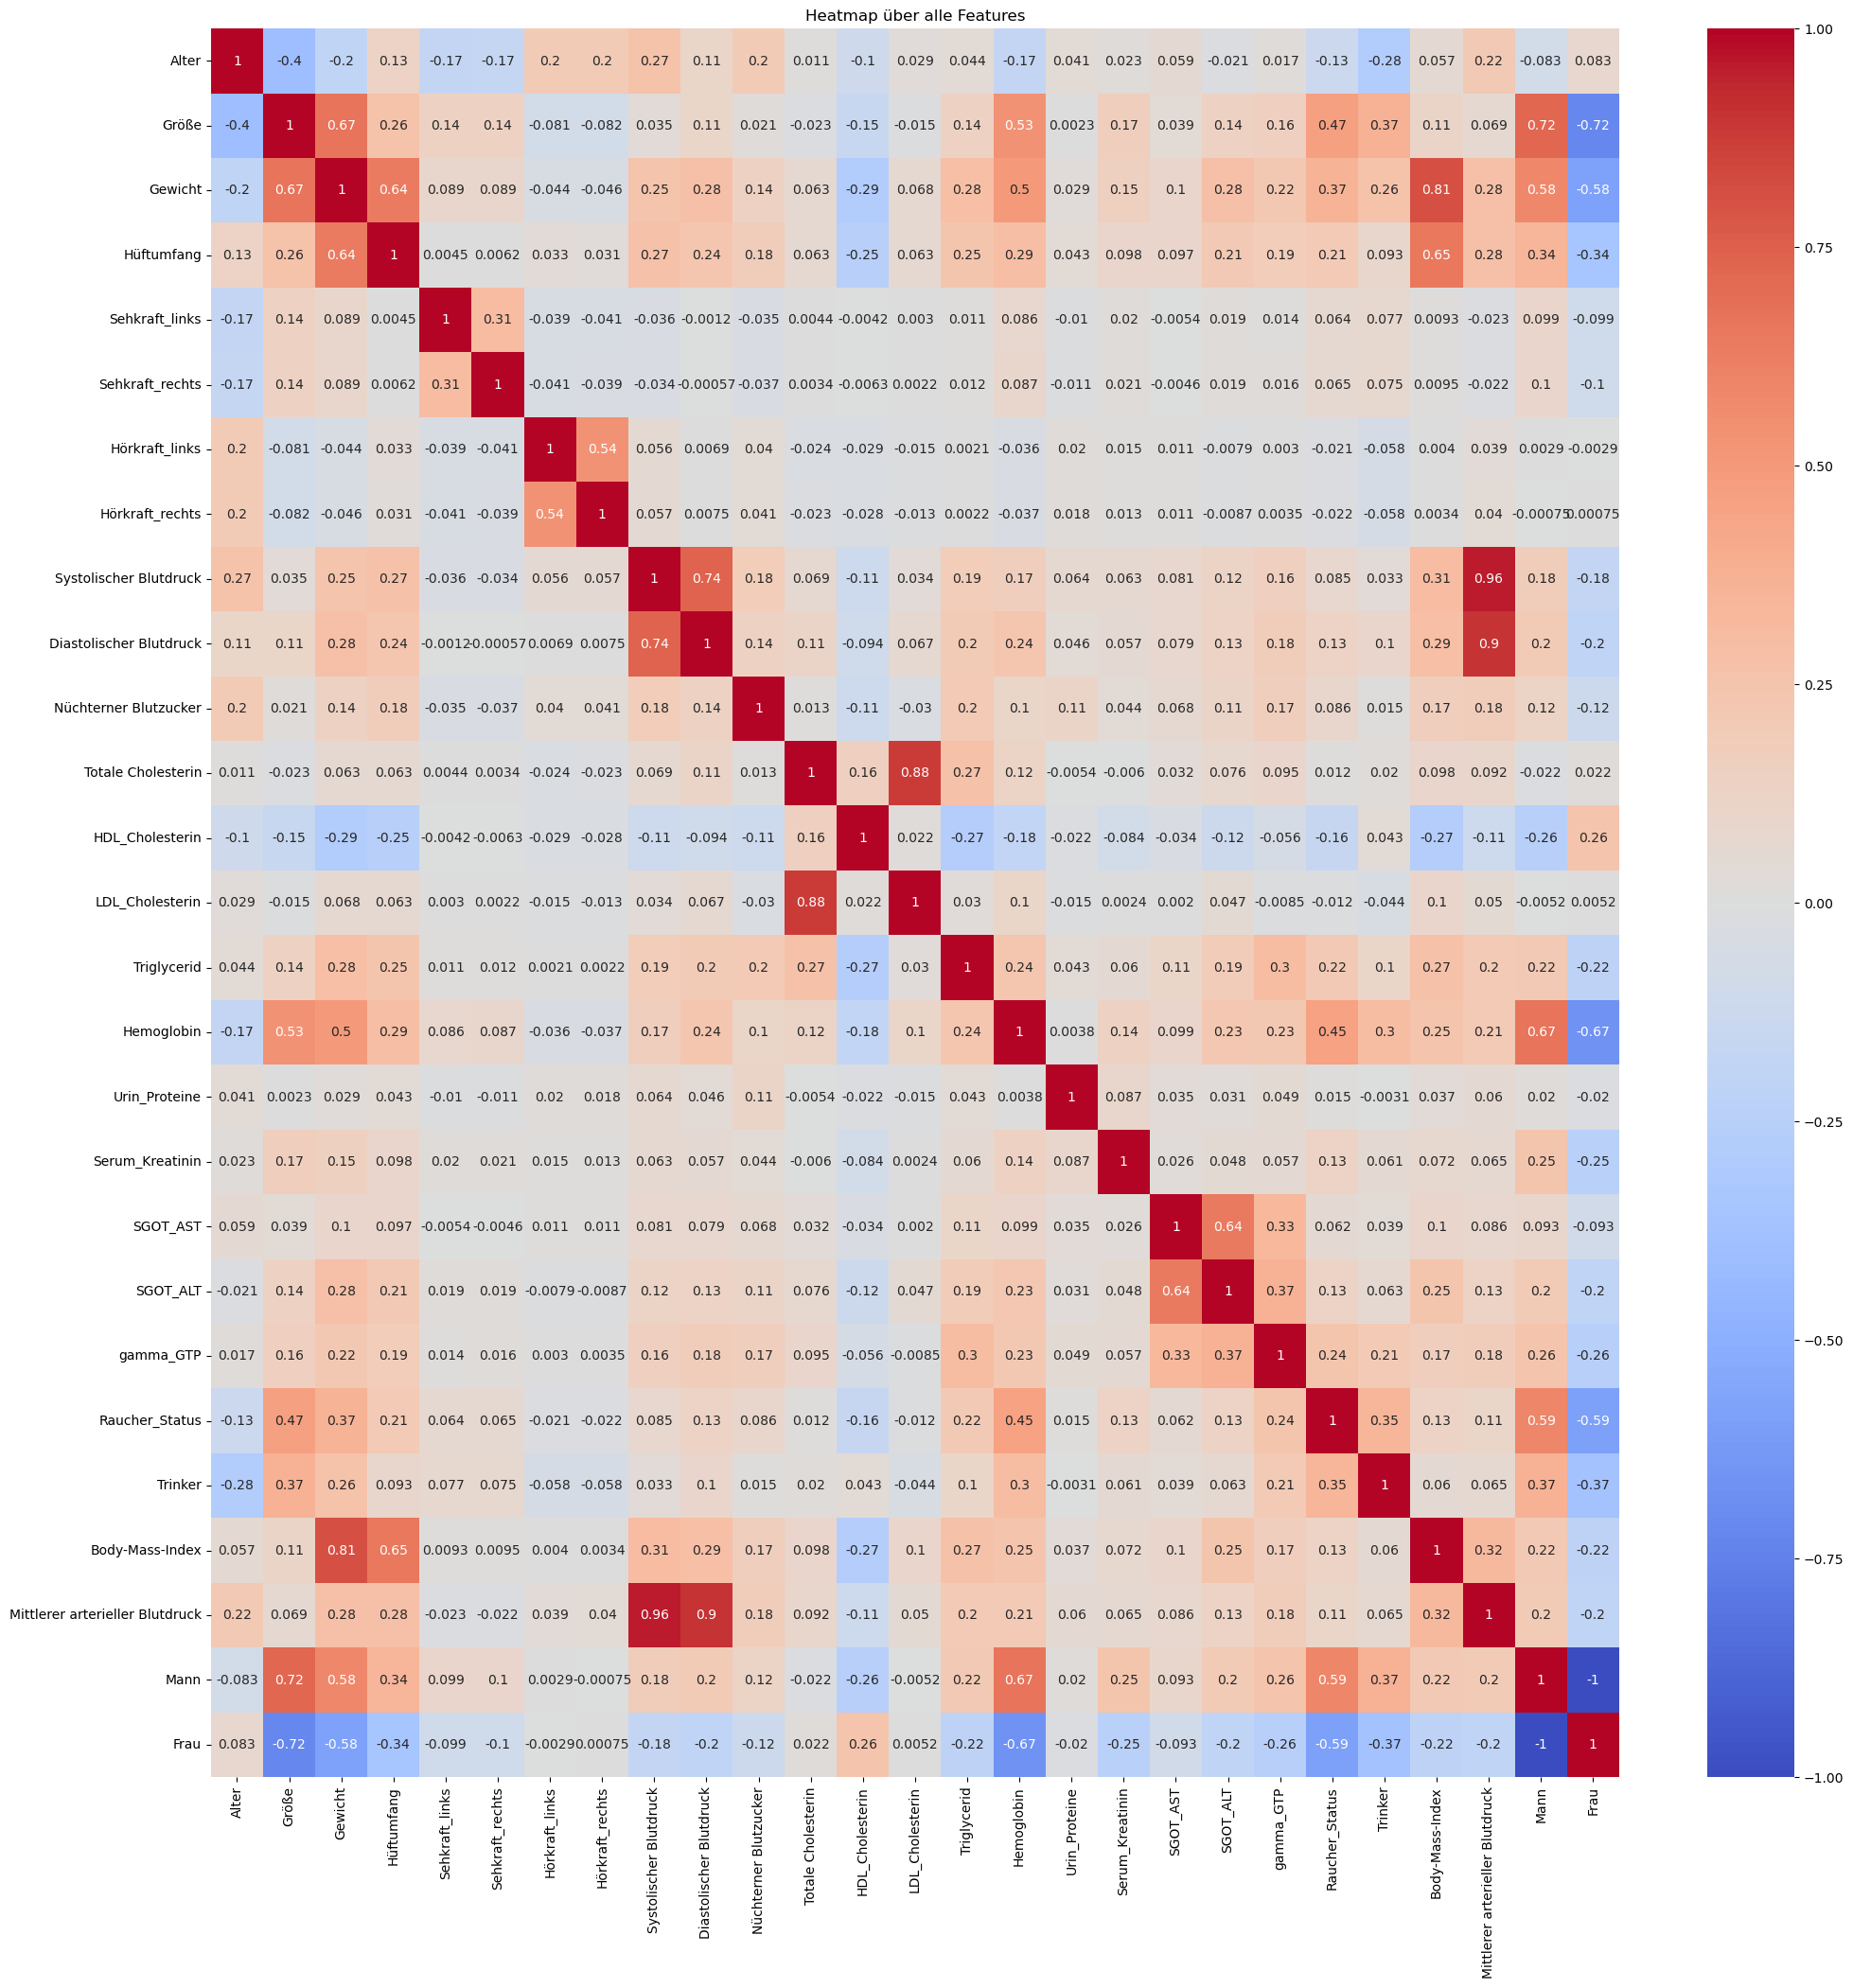

In [7]:
# Untersuchung der Korrelation aller Features in einer Heatmap:

plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.title('Heatmap über alle Features')
plt.show()

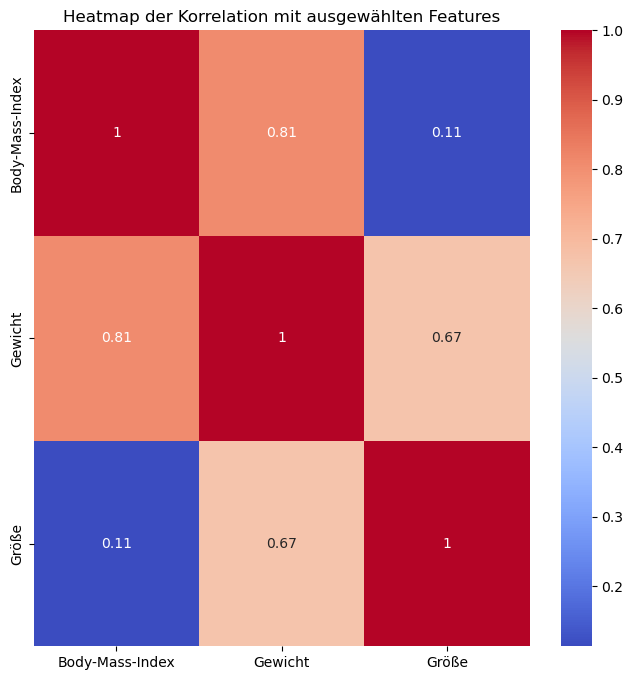

In [8]:
# Untersuchung der Korrelation mit weniger Features:

    # BMI, Gewicht, Größe:

plt.figure(figsize=(8, 8))
dataset1 = dataset[['Body-Mass-Index', 'Gewicht', 'Größe']]
heatmap = sns.heatmap(dataset1.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap der Korrelation mit ausgewählten Features')
plt.show()

In [ ]:
# Erkenntnisse: 

# Zu Beginn erfolgte eine Analyse der Korrelation aller Features mithilfe einer Heatmap. Dabei zeigte sich, dass eine fokussierte Untersuchung 
# unter Verwendung einer reduzierten und gezielt ausgewählten Auswahl von Features sinnvoller ist. Für eine detailliertere Analyse wurden die 
# Merkmale "Größe", "Gewicht" und "BMI" ausgewählt. Besonders auffällig ist die deutliche Korrelation zwischen Gewicht und BMI. Bemerkenswert ist
# jedoch die niedrige Korrelation zwischen Größe und BMI in dieser Darstellung. Generell neigen Personen mit größerer Körpergröße dazu, höhere 
# BMI-Werte aufzuweisen, da der BMI das Verhältnis von Gewicht zu Größe berücksichtigt. Diese Feststellung erfordert eine vertiefte Analyse im 
# Datensatz, um die Hintergründe dieser Beziehung genauer zu erforschen.

Erstellen/Konvertieren Sie eine Time Series.

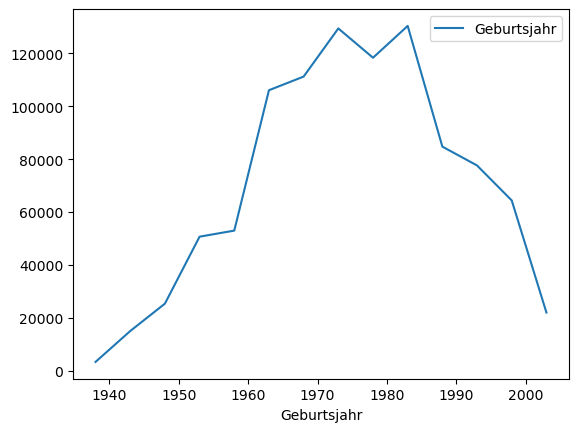

In [10]:
# Zeitreihe basierend auf dem Geburtsjahr erstellen:

dataset['Geburtsjahr'] = 2023 - dataset['Alter']

years = dataset.groupby('Geburtsjahr').agg({'Geburtsjahr':'count'})

years.plot()
plt.show()

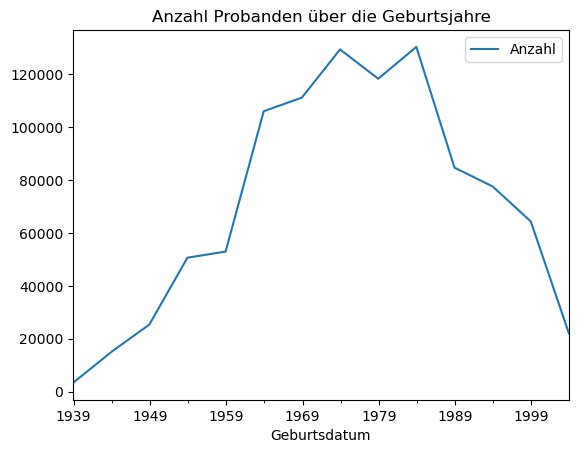

In [11]:
# Upsampling des Datasets auf Monatsebene, da wir das Geburtsjahr lediglich in 5-Jahres-Intervallen vorliegen haben:

    # Datumsspalte erstellen:

dataset['Geburtstag'] = '1231'
dataset['Geburtsdatum'] = dataset['Geburtsjahr'].astype(str) + dataset['Geburtstag']

dataset['Geburtsdatum'] = pd.to_datetime(dataset['Geburtsdatum'], format = '%Y%m%d')

dataset['Anzahl'] = 1

    # Lineares Resampling auf Monatsebene:

years = dataset.groupby('Geburtsdatum').agg({'Anzahl': 'count'})

years_upsampled = years.resample('M').asfreq().interpolate(method='linear')

years_upsampled.plot()
plt.title('Anzahl Probanden über die Geburtsjahre')
plt.show()

Erstellen Sie eine Analyse basierend auf den Zeitdaten.

Steigung : 82.14490452932876
y-Achsenabschnitt : 43169.032688107225


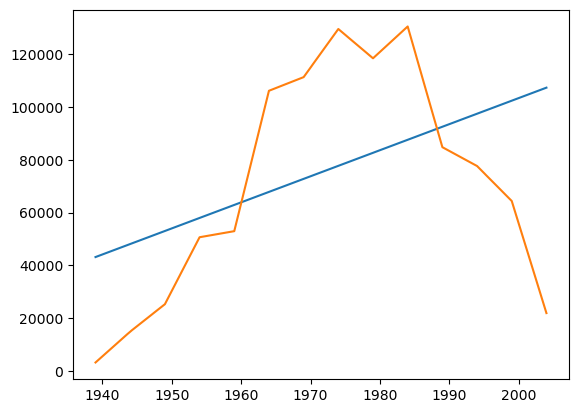

In [12]:
# Hinzufügen einer Trendlinie:

years = years_upsampled.reset_index()

x = np.arange(years['Geburtsdatum'].size)

fit = np.polyfit(x, years['Anzahl'], deg=1)
print ("Steigung : " + str(fit[0]))
print ("y-Achsenabschnitt : " + str(fit[1]))

fit_function = np.poly1d(fit)

plt.plot(years['Geburtsdatum'], fit_function(x))
plt.plot(years['Geburtsdatum'], years['Anzahl'])

plt.show()

In [13]:
# Erkenntnissen aus der Zeitreihe:

# Der vorliegende Datensatz erweist sich als weniger geeignet für Zeitreihenanalysen. Dennoch wurde die Analysemethode angewendet, wobei 
# das Geburtsjahr als der einzige verfügbare zeitliche Wert auf der horizontalen Achse verwendet wurde. Die vertikale Achse repräsentiert die 
# Anzahl der Geburtsjahre. Die grafische Darstellung offenbart einen zunächst ansteigenden Trend in der Anzahl der Probanden mit fortschreitendem 
# Geburtsjahr. Ab dem Jahr 1983 zeigt sich jedoch ein Abflachen dieses Trends. Dies wird durch eine eingezeichnete Trendlinie zusätzlich
# verdeutlicht. Es ist wichtig zu betonen, dass die gewählte Analysemethode für diesen Datensatz nicht optimal geeignet ist. Diese Analyse 
# diente vielmehr dem Zweck, die Methodik kennenzulernen und anzuwenden, als präzise Erkenntnisse zu generieren.

# Archiv

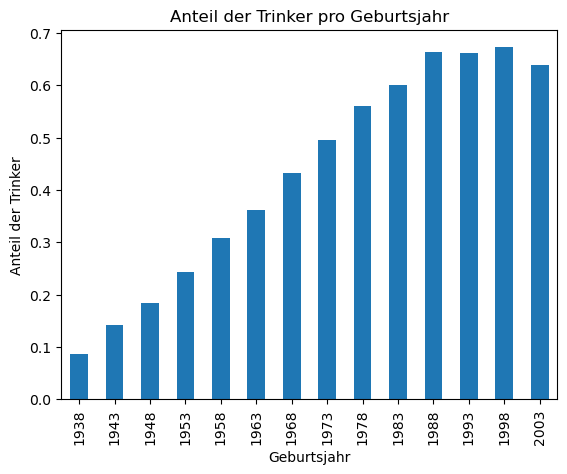

In [14]:
# Zusätzliche Analyse: Anteil Trinker je Alter

grouped = dataset.groupby('Geburtsjahr')['Trinker'].sum()

# Zählen Sie die Gesamtanzahl pro Geburtsjahr

total_by_year = dataset['Geburtsjahr'].value_counts()

# Berechnen Sie den Anteil der Trinker pro Geburtsjahr
anteil_trinker = grouped / total_by_year

# Erstellen Sie ein Balkendiagramm
anteil_trinker.plot(kind='bar', title='Anteil der Trinker pro Geburtsjahr')
plt.xlabel('Geburtsjahr')
plt.ylabel('Anteil der Trinker')
plt.show()

One Hot Encoding --> Einordung des Blutdrucks nach WHO
https://www.veroval.info/de-de/wissen/Blutdruck/wissenswertes-ueber-bluthochdruck

Laut WHO und anderer führender Gesundheitsorganisationen werden die systolischen und diastolischen Blutdruckwerte in sechs Kategorien1 unterteilt: optimal (bis zu 119 mmHg systolisch und bis zu 79 mmHg diastolisch), 
normal (120-129 mmHg systolisch und/oder 80-84 mmHg diastolisch), 
Grenzwert normal (130-139 mmHg systolisch und/oder 85-89 mmHg diastolisch), 
Hypertonie Grad 1 (140-159 mmHg systolisch und/oder 90-99 mmHg diastolisch), 
Hypertonie Grad 2 (160-179 mmHg systolisch und/oder 100-109 mmHg diastolisch) und 
Hypertonie Grad 3 (> 180 mmHg systolisch und/oder > 110 mmHg diastolisch).

In [15]:
dataset["BD_optimal"] = dataset['Systolischer Blutdruck']
dataset["BD_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Grenzwert_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 1"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 2"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 3"] = dataset['Systolischer Blutdruck']

## Blutdruck

Problem - Bedingungen um Blutdruck einzuteilen können nicht immer erfüllt werden. (Bspw. Sys. Blutdruck normal; Dias. Blutdruck optimal. Daher keine Einordung)

Lösungen:

    1. Tolernazen einbauen

    2. Nach mittleren Blutdruck gehen

    3. Nur Obergrenzen festlegen
    
    4. Sys. und Dias. Blutdruck eigenständig Einordungen. Anschließend beide Einordungen "vergleichen" und Mittlere Einordung nehemen. Eventuell mit Hang zum schlechteren.

Lösung 2:

BD_optimal --> <=119 / <=79 --> <100

BD_normal --> 120 - 129 / 80 - 84 --> >=100 - <106,5

BD_Grenzwert_normal --> 130 - 139 / 85 - 89 --> >=106,5 - <111,5

BD_Hypertonie Grad 1  --> 140 - 159 / 90 - 99 --> >=111,5 - <129

BD_Hypertonie Grad 2  --> 160 - 179 / 100 - 109 --> >=129 - <144

BD_Hypertonie Grad 3  --> >179 / >109 --> >=111,5 - >=144

In [16]:
dataset["BD_optimal"] = (dataset['Mittlerer arterieller Blutdruck'] <100)
dataset["BD_optimal"] = dataset["BD_optimal"].astype(int)

dataset["BD_normal"] = (dataset['Mittlerer arterieller Blutdruck'] >= 100) & (dataset['Mittlerer arterieller Blutdruck'] < 106.5)
dataset["BD_normal"] = dataset["BD_normal"].astype(int) 

dataset["BD_Grenzwert_normal"] = (dataset['Mittlerer arterieller Blutdruck'] >= 106.5) & (dataset['Mittlerer arterieller Blutdruck'] < 111.5)
dataset["BD_Grenzwert_normal"] = dataset["BD_Grenzwert_normal"].astype(int) 

dataset["BD_Hypertonie Grad 1"] = (dataset['Mittlerer arterieller Blutdruck'] >= 111.5) & (dataset['Mittlerer arterieller Blutdruck'] < 129)
dataset["BD_Hypertonie Grad 1"] = dataset["BD_Hypertonie Grad 1"].astype(int) 

dataset["BD_Hypertonie Grad 2"] = (dataset['Mittlerer arterieller Blutdruck'] >= 129) & (dataset['Mittlerer arterieller Blutdruck'] < 144)
dataset["BD_Hypertonie Grad 2"] = dataset["BD_Hypertonie Grad 2"].astype(int) 

dataset["BD_Hypertonie Grad 3"] = (dataset['Mittlerer arterieller Blutdruck'] >=144)
dataset["BD_Hypertonie Grad 3"] = dataset["BD_Hypertonie Grad 3"].astype(int) 

## Eleminieren von Feauteres. Begründung s. Doku

In [18]:
dataset.head()

,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,Diastolischer Blutdruck,...,Geburtsjahr,Geburtstag,Geburtsdatum,Anzahl,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1988,1231,1988-12-31,1,0,1,0,0,0,0
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,1993,1231,1993-12-31,1,0,1,0,0,0,0
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,1983,1231,1983-12-31,1,1,0,0,0,0,0
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1973,1231,1973-12-31,1,0,0,0,1,0,0
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,1973,1231,1973-12-31,1,0,0,1,0,0,0


In [19]:
dataset.columns

Index(['Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Sehkraft_links',
       'Sehkraft_rechts', 'Hörkraft_links', 'Hörkraft_rechts',
       'Systolischer Blutdruck', 'Diastolischer Blutdruck',
       'Nüchterner Blutzucker', 'Totale Cholesterin', 'HDL_Cholesterin',
       'LDL_Cholesterin', 'Triglycerid', 'Hemoglobin', 'Urin_Proteine',
       'Serum_Kreatinin', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'Raucher_Status', 'Trinker', 'Body-Mass-Index',
       'Mittlerer arterieller Blutdruck', 'Mann', 'Frau', 'Geburtsjahr',
       'Geburtstag', 'Geburtsdatum', 'Anzahl', 'BD_optimal', 'BD_normal',
       'BD_Grenzwert_normal', 'BD_Hypertonie Grad 1', 'BD_Hypertonie Grad 2',
       'BD_Hypertonie Grad 3'],
      dtype='object')

In [21]:
dataset_to_safe = dataset.drop(columns=['Sehkraft_links', 'Sehkraft_rechts', 'Hörkraft_links', 'Hörkraft_rechts', 'Urin_Proteine', 'Serum_Kreatinin', 'Geburtstag', 'Geburtsdatum', 'Anzahl'])

In [22]:
dataset_to_safe.head()

,Alter,Größe,Gewicht,Hüftumfang,Systolischer Blutdruck,Diastolischer Blutdruck,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,Mittlerer arterieller Blutdruck,Mann,Frau,Geburtsjahr,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3
0,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,...,100.0,1,0,1988,0,1,0,0,0,0
1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,...,106.0,1,0,1993,0,1,0,0,0,0
2,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,...,95.0,1,0,1983,1,0,0,0,0,0
3,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,...,116.0,1,0,1973,0,0,0,1,0,0
4,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,...,110.0,1,0,1973,0,0,1,0,0,0


## Raucher Status encoden

In [23]:
dataset_to_safe['Raucher_nie'] = np.where(dataset_to_safe['Raucher_Status'] == 1, 1, 0)
dataset_to_safe['Raucher_ehem'] = np.where(dataset_to_safe['Raucher_Status'] == 2, 1, 0)
dataset_to_safe['Raucher_aktiv'] = np.where(dataset_to_safe['Raucher_Status'] == 3, 1, 0)

In [25]:
print(dataset_to_safe.columns)

Index(['Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Systolischer Blutdruck',
       'Diastolischer Blutdruck', 'Nüchterner Blutzucker',
       'Totale Cholesterin', 'HDL_Cholesterin', 'LDL_Cholesterin',
       'Triglycerid', 'Hemoglobin', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'Trinker', 'Body-Mass-Index', 'Mittlerer arterieller Blutdruck', 'Mann',
       'Frau', 'Geburtsjahr', 'BD_optimal', 'BD_normal', 'BD_Grenzwert_normal',
       'BD_Hypertonie Grad 1', 'BD_Hypertonie Grad 2', 'BD_Hypertonie Grad 3',
       'Raucher_nie', 'Raucher_ehem', 'Raucher_aktiv'],
      dtype='object')


In [24]:
dataset_to_safe = dataset_to_safe.drop(columns=['Raucher_Status'])

In [26]:
dataset_to_safe = dataset_to_safe.drop(columns=['Mittlerer arterieller Blutdruck', 'Systolischer Blutdruck', 'Diastolischer Blutdruck'])

In [27]:
dataset_to_safe = dataset_to_safe.rename(columns={'Hemoglobin': 'Hämoglobin'} )

In [29]:
#dataset_to_safe.to_csv('../../dataset_custom.csv')

In [30]:
dataset_to_safe.shape

(991346, 27)